# Data Loading and Plotting example

In [154]:
%matplotlib inline
import numpy as np
import matplotlib
import sys 

sys.path.insert(0,'..')
from utils import plot_stroke
from utils.data_preprocessing import get_data_and_mask

In [233]:
strokes = numpy.load('../data/strokes.npy', encoding='bytes')
with open('../data/sentences.txt', encoding="utf8") as f:  
    texts = f.read().splitlines()

l = [list(x) for x in texts]

L = np.asarray(l)
from collections import Counter
c = Counter()
for l in L:
    c.update(l)
unq = np.asarray(sorted(c))
unq
o = [1,2,3]
print(len(o))
# a = np.asarray(L[0]).astype('uint8')
# torch.from_numpy(a)

TypeError: 'list' object is not callable

In [166]:
sentences = open('../data/sentences.txt').read().splitlines()
list(sentences[0])

['i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'a',
 'b',
 'u',
 'n',
 'd',
 'a',
 'n',
 'c',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 'p',
 'e',
 'a',
 'c',
 'e',
 '"']

In [26]:
len = []
for stroke in strokes:
    len.append(stroke.shape[0])
# len = numpy.asarray(len)
shape = (6000, numpy.max(len))
print(shape)
print(strokes[0].dtype)
stroke_Arr = numpy.asarray(strokes)
data, m = get_data_and_mask(strokes)
mean = data[:,:,1:].mean(axis=(0,1))
print(data[0,0])
data[0,:,1:] = data[0,:,1:] - mean
std = data[0,:,1:].std(axis=(0,1))
data[0,:,1:] = (data[0,:,1:] - mean)/std
stroke = data[0]
print(stroke)
data[0,:,1:] = data[0,:,1:]*std + mean
print(data[0,0])

(6000, 1191)
float32
[0. 0. 0.]
[[ 0.         -0.31663123  0.00460665]
 [ 0.         -0.31663123  0.00460665]
 [ 0.         -0.13927811  0.00460665]
 ...
 [ 0.         -0.31663123  0.00460665]
 [ 0.         -0.31663123  0.00460665]
 [ 0.         -0.31663123  0.00460665]]
[ 0.         -0.22316441  0.0032468 ]


In [43]:
l = [1] + [10]*5
l = torch.from_numpy(numpy.asarray(l))
y = torch.split(l, [2,2,2])
y


(tensor([ 1, 10]), tensor([10, 10]), tensor([10, 10]))

In [58]:
k = numpy.array([numpy.array([1]),numpy.array([3])])
k
int(0.9*60)
for i in range(1, 3):
    print(i)
# k.item()

1
2


In [80]:
x = torch.distributions.uniform.Uniform(torch.tensor([-0.5,-0.5]), torch.tensor([0.5,0.5]))
x.sample()

tensor([-0.3544,  0.0757])

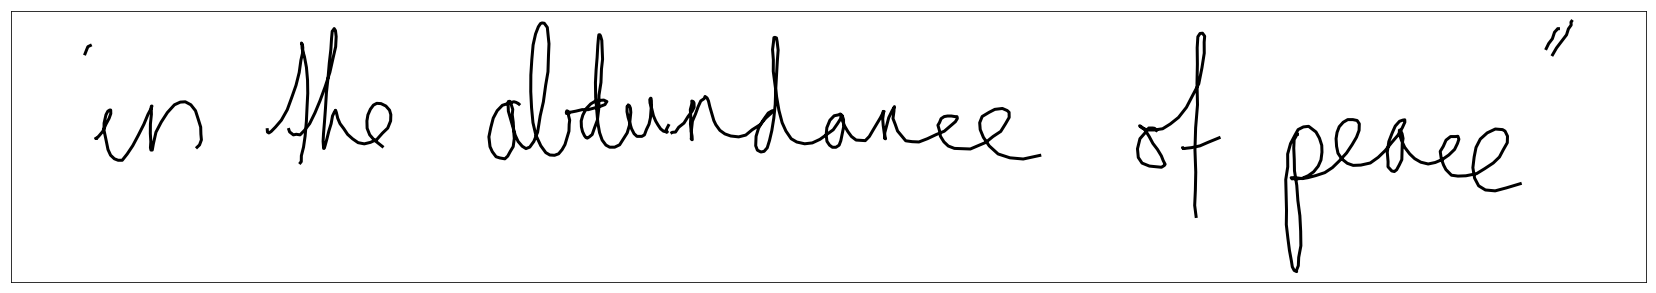

TEXT: in the abundance of peace"

[[ 0.09430851 -0.00137209]
 [ 0.09430851 -0.00137209]
 [ 0.5910637  -0.00137209]
 ...
 [ 0.09430851 -0.00137209]
 [ 0.09430851 -0.00137209]
 [ 0.09430851 -0.00137209]]


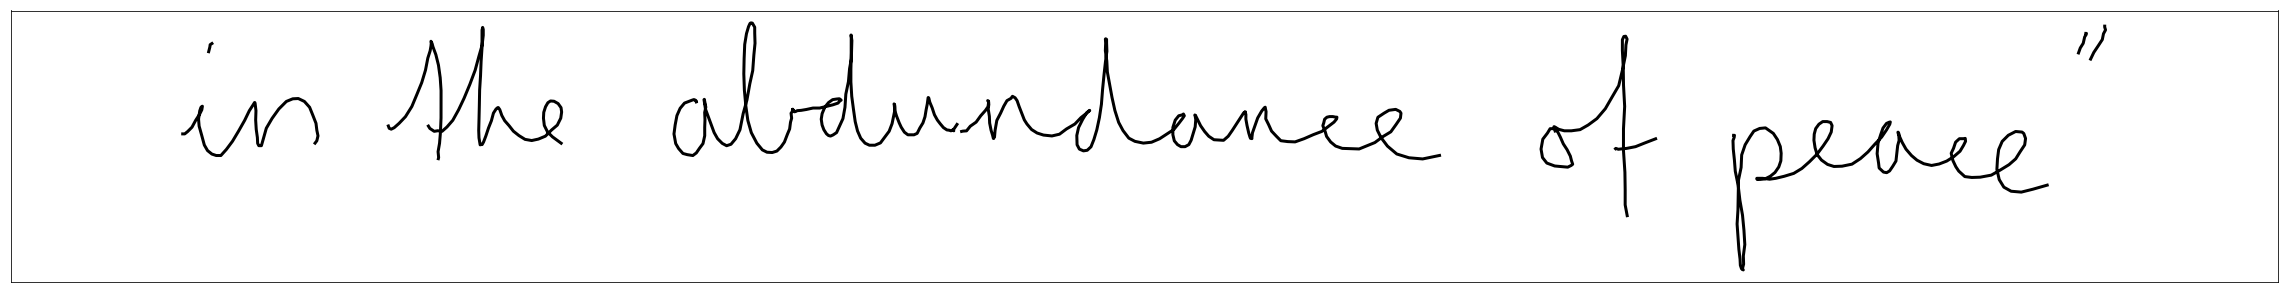

[[ 0.    0.    0.  ]
 [ 0.    0.    0.  ]
 [ 0.    0.25  0.  ]
 ...
 [ 0.   -0.85 -1.2 ]
 [ 0.   -0.6  -1.15]
 [ 1.   -0.8  -0.8 ]]


In [79]:
idx = 0
#stroke = strokes[idx]
text = texts[idx]
plot_stroke(stroke)
print('TEXT:', text)
print(stroke[:,1:]*std + mean)
stroke[:,1:] = stroke[:,1:]*std + mean
plot_stroke(stroke)
print(strokes[0])

### Strokes

Each handwritten sentence is represented as a 2D array with T rows and 3 columns. T is the number of timesteps. The first column represents whether to interrumpt the current stroke (i.e. when the pen is lifted off the paper). The second and third columns represent the relative coordinates of the new point with respect to the last point. Please have a look at the plot_stroke if you want to understand how to plot this sequence.

In [19]:
stroke

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.25      ,  0.        ],
       ..., 
       [ 0.        , -0.85000002, -1.20000005],
       [ 0.        , -0.60000002, -1.14999998],
       [ 1.        , -0.80000001, -0.80000001]], dtype=float32)

In [37]:
import torch

x = torch.zeros(3,2)
x[:,0:1].shape
x[:,0:1]

tensor([[0.],
        [0.],
        [0.]])